# Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import h5py as h5 #to read the correlator
import numpy as np #to do everything
from pathlib import Path #to read the file's names
from typing import Any, Callable #to use annotations for functions
import matplotlib.pyplot as plt #to plot stuff
from tqdm import tqdm #for a nice view of for loops with loading bars
import os #to access enviromental variables




import sys

sys.path.insert(1, '../')

from moments_toolkit import moments_toolkit


# Tests 1

In [2]:
p3fold = os.environ['mount_point_path'] + "48c48/binned_1012_hmz370_BMW/3PointCorrelation/"
p2fold = os.environ['mount_point_path'] + "48c48/binned_1012_hmz370_BMW/2PointCorrelation/"


opAnalyzer = moments_toolkit(p3fold, p2fold,
                     maxConf=20, T_to_remove_list=[12,10],
                     verbose=False)

100%|██████████| 13/13 [00:15<00:00,  1.21s/it]


In [3]:
opAnalyzer.select_operator(28,32,380)

oplist = opAnalyzer.selected_op

oplist

Klist = [op.K for op in oplist]

_ = [display(K) for K in Klist]

[O[1, 3] + O[3, 1], O[3, 4] + O[4, 3], O[2, 1, 2, 2] - O[4, 3, 4, 4]]

I*p_1*(E(p)*m_N + m_N**2 + 2*p_3**2)/(E(p)*(E(p) + m_N))

(-E(p)**3 - 2*E(p)**2*m_N - E(p)*m_N**2 + E(p)*p_1**2 + E(p)*p_2**2 - 3*E(p)*p_3**2 - 2*m_N*p_3**2)/(2*E(p)*(E(p) + m_N))

2*I*p_2**2*(-E(p)*m_N - m_N**2 - p_1**2 - p_2**2)/(E(p)*(E(p) + m_N))

In [4]:
from Kfact_calculator import mN, E, p_mu, p1,p2,p3

In [5]:
myop = oplist[0]
myop.K


E
p_mu

I*p_1*(E(p)*m_N + m_N**2 + 2*p_3**2)/(E(p)*(E(p) + m_N))

E(p)

[p_1, p_2, p_3, I*E(p)]

In [6]:
E in myop.K.free_symbols
[p in myop.K.free_symbols for p in p_mu]

True

[True, False, True, False]

In [7]:
E in myop.K.free_symbols
mN in myop.K.free_symbols
p1 in myop.K.free_symbols
p3 in myop.K.free_symbols

True

True

True

True

In [8]:
mass = opAnalyzer.get_meff()[0]

mass

np.float64(0.41561275768889294)

In [9]:
subsDict = {E:mass,mN:mass,p1:0,p2:0,p3:0}

{k:v for (k,v) in subsDict.items() if k in myop.K.free_symbols}

{E(p): np.float64(0.41561275768889294),
 m_N: np.float64(0.41561275768889294),
 p_1: 0,
 p_3: 0}

In [10]:
myop = opAnalyzer.get_operator(28)
myop.K

myop.K.evalf(subs={p2:0})

I*p_1*(E(p)*m_N + m_N**2 + 2*p_3**2)/(E(p)*(E(p) + m_N))

I*p_1*(E(p)*m_N + m_N**2 + 2.0*p_3**2)/(E(p)*(E(p) + m_N))

In [11]:
myop = opAnalyzer.get_operator(32)
myop.K
myop.K.evalf(subs={k:v for (k,v) in subsDict.items() if k in myop.K.free_symbols})
float(myop.K.evalf(subs=subsDict))

(-E(p)**3 - 2*E(p)**2*m_N - E(p)*m_N**2 + E(p)*p_1**2 + E(p)*p_2**2 - 3*E(p)*p_3**2 - 2*m_N*p_3**2)/(2*E(p)*(E(p) + m_N))

-0.415612757688893

-0.41561275768889294

O[3, 3] - O[4, 4]

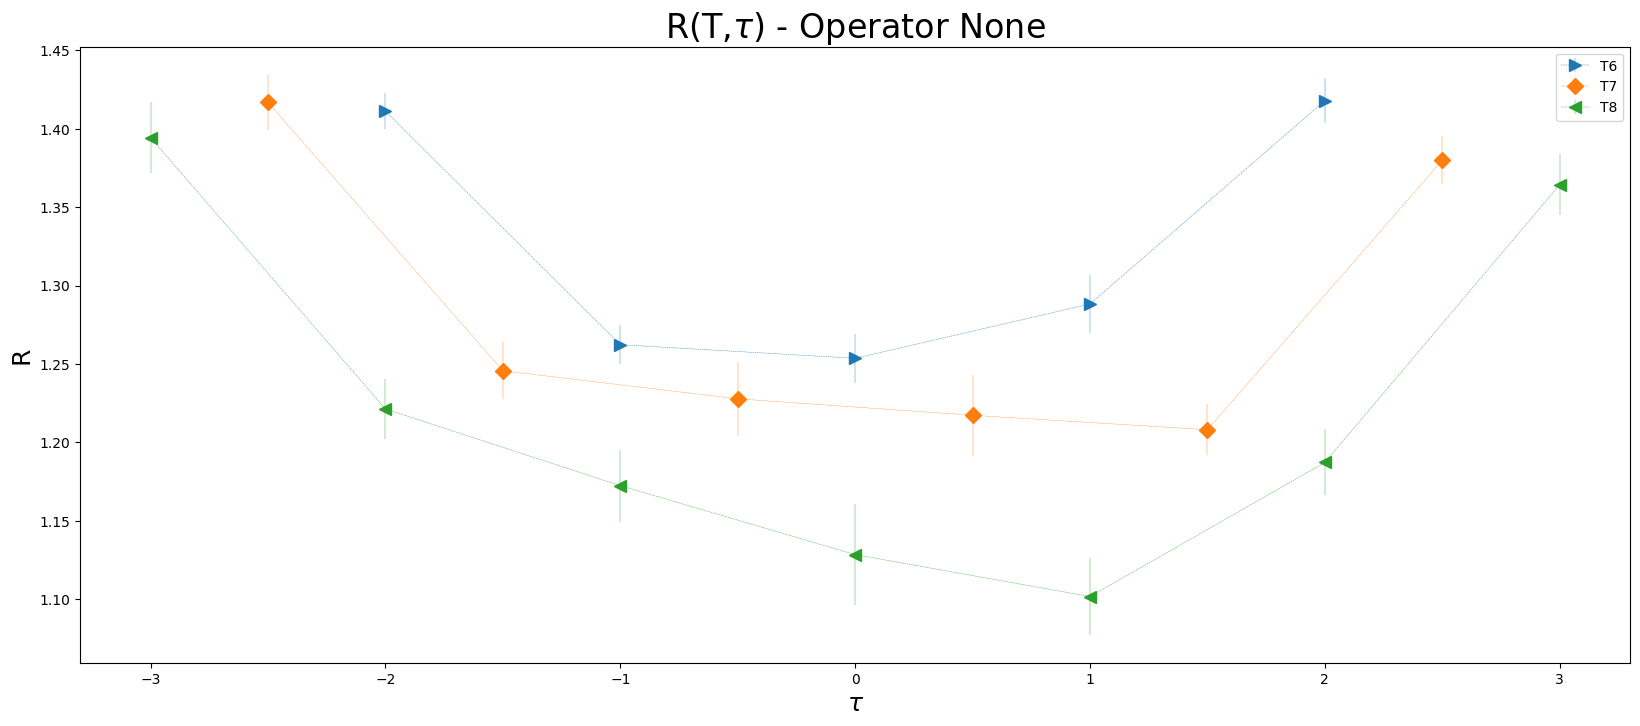

In [12]:
opAnalyzer.select_operator()
op2 = opAnalyzer.get_operator(2)
op3 = opAnalyzer.get_operator(3)

opV2 = (op2-op3) /(3*np.sqrt(2))
opV2*np.sqrt(2)

opAnalyzer.selected_op.append(opV2)

opAnalyzer.plot_R(rescale=True,abs=True)